In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [39]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [40]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
363186,363187,Male,50,1,48.0,0,1-2 Year,Yes,2630.0,124.0,222,0
269001,269002,Male,34,1,41.0,0,< 1 Year,Yes,36644.0,124.0,109,1
345120,345121,Female,23,1,28.0,0,< 1 Year,No,35506.0,152.0,287,0
18351,18352,Male,64,0,38.0,0,1-2 Year,Yes,2630.0,124.0,282,0
215124,215125,Female,44,1,28.0,0,1-2 Year,Yes,37097.0,29.0,15,0


In [41]:
test.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
34507,415617,Male,54,1,28.0,0,1-2 Year,Yes,29321.0,13.0,182
81086,462196,Male,49,1,46.0,0,> 2 Years,Yes,36513.0,26.0,225
47520,428630,Male,48,1,28.0,0,1-2 Year,Yes,35849.0,124.0,125
17534,398644,Male,20,1,8.0,0,< 1 Year,Yes,175886.0,160.0,171
29399,410509,Female,47,1,46.0,0,1-2 Year,Yes,37309.0,124.0,269


In [42]:
train.shape

(381109, 12)

In [43]:
test.shape

(127037, 11)

## Checking if any values are missing in train data set

In [44]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### No missing values in train data set

## Numerical Description of the datasets

In [45]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [46]:
numerical = ['Age', 'Previously_Insured', 'Annual_Premium', 'Vintage']

In [47]:
train[numerical].describe()

,Age,Previously_Insured,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.458210,30564.389581,154.347397
std,15.511611,0.498251,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,0.000000,24405.000000,82.000000
50%,36.000000,0.000000,31669.000000,154.000000
75%,49.000000,1.000000,39400.000000,227.000000
max,85.000000,1.000000,540165.000000,299.000000


### Count Plot of Responses

Response being they have taken vehicle insurance or not

0 - Did not buy vehicle insurance \
1 - Bought vehicle insurance

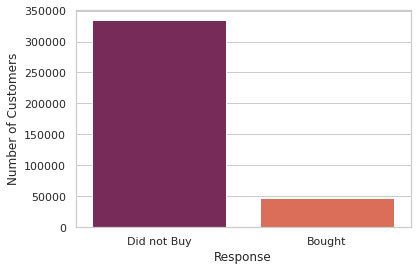

In [48]:
countPlot = sns.countplot(train['Response'], palette="rocket")
countPlot.set_ylabel('Number of Customers')
countPlot.set_xticklabels(['Did not Buy', 'Bought'], rotation=0 )
plt.show(countPlot)

In [49]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Distribution Plot of Ages of Customers

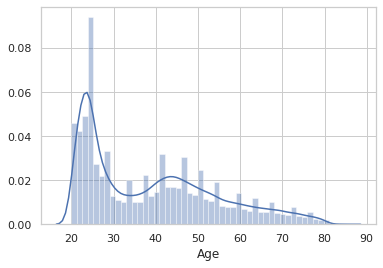

In [50]:
sns.distplot(train['Age'])

### Finding outliers by Age

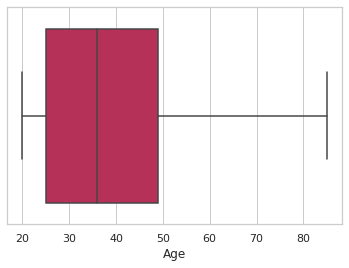

In [52]:
sns.boxplot(x='Age', data=train, palette="rocket")

## Comparing Age with Annual Premium

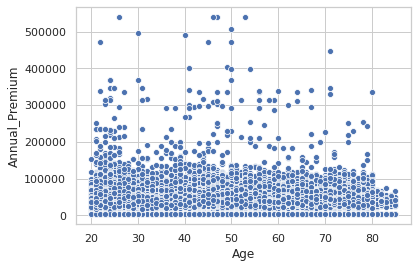

In [53]:
sns.scatterplot(x=train['Age'], y=train['Annual_Premium'], palette="rocket")

## Comparision By Gender

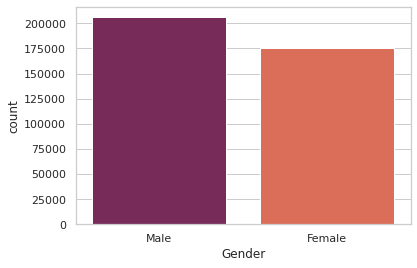

In [54]:
sns.countplot(train['Gender'], palette = "rocket")

In [55]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

We have a slightly higher number of males than females in our training dataset

## Comparing their Responses (Responses based on Gender)

In [56]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

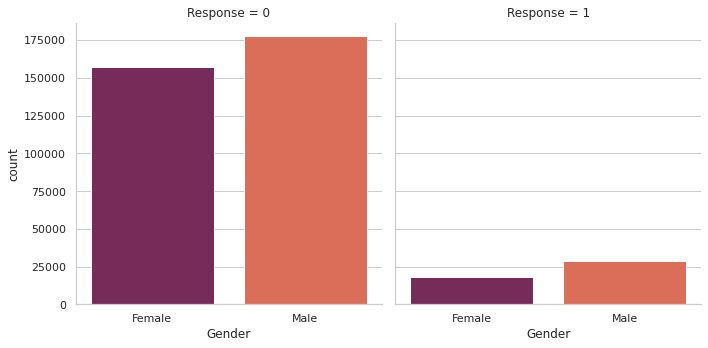

In [60]:
g = sns.catplot(x="Gender", y="count",col="Response",data=df, kind="bar", palette="rocket");

## Comparing Driving licenses by Gender

In [61]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [62]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


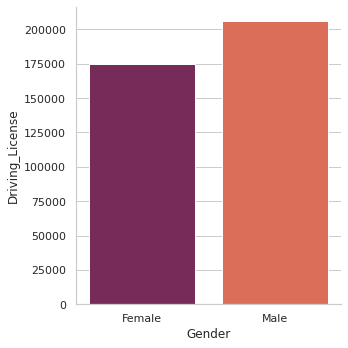

In [63]:
sns.catplot(x="Gender", y="Driving_License", data=df, kind="bar", palette="rocket");